# Basic SQL in python

In [1]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
connection = sqlite3.connect('../database.sqlite')

In [3]:
c = connection.cursor()

Print the first two lines of the country table of database.sqlite:

In [4]:
for row in c.execute("select * from country limit 2"):
    print(row)

('AFG', 'Afghanistan', 'Afghanistan', 'Islamic State of Afghanistan', 'AF', 'Afghan afghani', 'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.', 'South Asia', 'Low income', 'AF', '2002/03', '', 'Value added at basic prices (VAB)', 'IDA', 'HIPC', 'Country uses the 1993 System of National Accounts methodology.', '', '', '', 'Actual', 'General trade system', 'Consolidated central government', 'General Data Dissemination System (GDDS)', '1979', 'Multiple Indicator Cluster Survey (MICS), 2010/11', 'Integrated household survey (IHS), 2008', '', '2013/14', '', 2013, 2000)
('ALB', 'Albania', 'Albania', 'Republic of Albania', 'AL', 'Albanian lek', '', 'Europe & Central Asia', 'Upper middle income', 'AL', 'Original chained constant price data are rescaled.', '1996', 'Value added at basic prices (VAB)', 'I

We can directly store the sql data in a pandas data frame:

In [5]:
country = pd.read_sql("select * from country", con = connection)

In [6]:
country.head(3)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


In [7]:
pd.read_sql("select * from country where CountryCode = 'CHE'", con = connection)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,,Europe & Central Asia,High income: OECD,CH,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010,2013,2000


Which is equivalent to:

In [8]:
country.loc[country['CountryCode'] == 'CHE']

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
214,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,,Europe & Central Asia,High income: OECD,CH,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010,2013,2000


In [9]:
pd.read_sql("select Region, count(*) as [Count] from country group by Region order by 2 desc", con = connection)

,Region,Count
0,Europe & Central Asia,57
1,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
3,East Asia & Pacific,36
4,,33
5,Middle East & North Africa,21
6,South Asia,8
7,North America,3


Some descriptins (from @JSab on Kaggle.com):

AG.LND.PRCP.MM : Average precipitation in depth (mm per year)

EG.ELC.ACCS.ZS : Access to electricity (% of population)

EG.ELC.FOSL.ZS : Electricity production from oil, gas and coal sources (% of total)

In [10]:
indicators = pd.read_sql(""" SELECT   * 
                             FROM     Indicators 
                             WHERE    IndicatorCode IN 
                                      (  'AG.LND.PRCP.MM, AG.LND.FRST.K2'
                                       , 'EG.ELC.ACCS.ZS', 'EG.ELC.FOSL.ZS'
                                       , 'EN.POP.DNST', 'SG.VAW.REAS.ZS'
                                       , 'SM.POP.NETM', 'SP.POP.65UP.TO.ZS'
                                       , 'FI.RES.TOTL.DT.ZS', 'GC.DOD.TOTL.GD.ZS'
                                       , 'MS.MIL.XPND.GD.ZS','SI.POV.GINI'
                                       , 'IP.JRN.ARTC.SC', 'SE.ADT.1524.LT.ZS'
                                      )  
                        """, con=connection)

In [11]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,75.447507
1,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,85.076308
2,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,100.000000
3,East Asia & Pacific (all income levels),EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,87.475061
4,East Asia & Pacific (developing only),EAP,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,86.118803


For instance, let's visualize the access to electricity for Central Europe and the Baltics and United States:

In [12]:
electricity_access_ceb = indicators.loc[(indicators['CountryCode'] == 'CEB') & (indicators['IndicatorCode'] == 'EG.ELC.FOSL.ZS'), 'Value']
year_ceb = indicators.loc[(indicators['CountryCode'] == 'CEB') & (indicators['IndicatorCode'] == 'EG.ELC.FOSL.ZS'), 'Year']
electricity_access_usa = indicators.loc[(indicators['CountryCode'] == 'USA') & (indicators['IndicatorCode'] == 'EG.ELC.FOSL.ZS'), 'Value']
year_usa = indicators.loc[(indicators['CountryCode'] == 'USA') & (indicators['IndicatorCode'] == 'EG.ELC.FOSL.ZS'), 'Year']

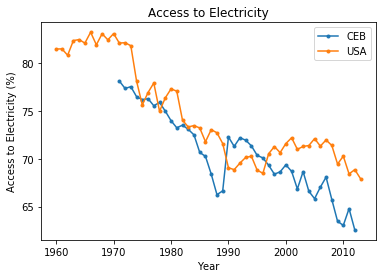

In [13]:
plt.plot(year_ceb, electricity_access_ceb, '.-')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.title('Access to Electricity')
plt.plot(year_usa, electricity_access_usa, '.-')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend(["CEB", "USA"])

## Some analysis 
### Gini Index
(see @JSab on kaggle for more info)

In [14]:
gini = indicators[indicators['IndicatorCode']== 'SI.POV.GINI']

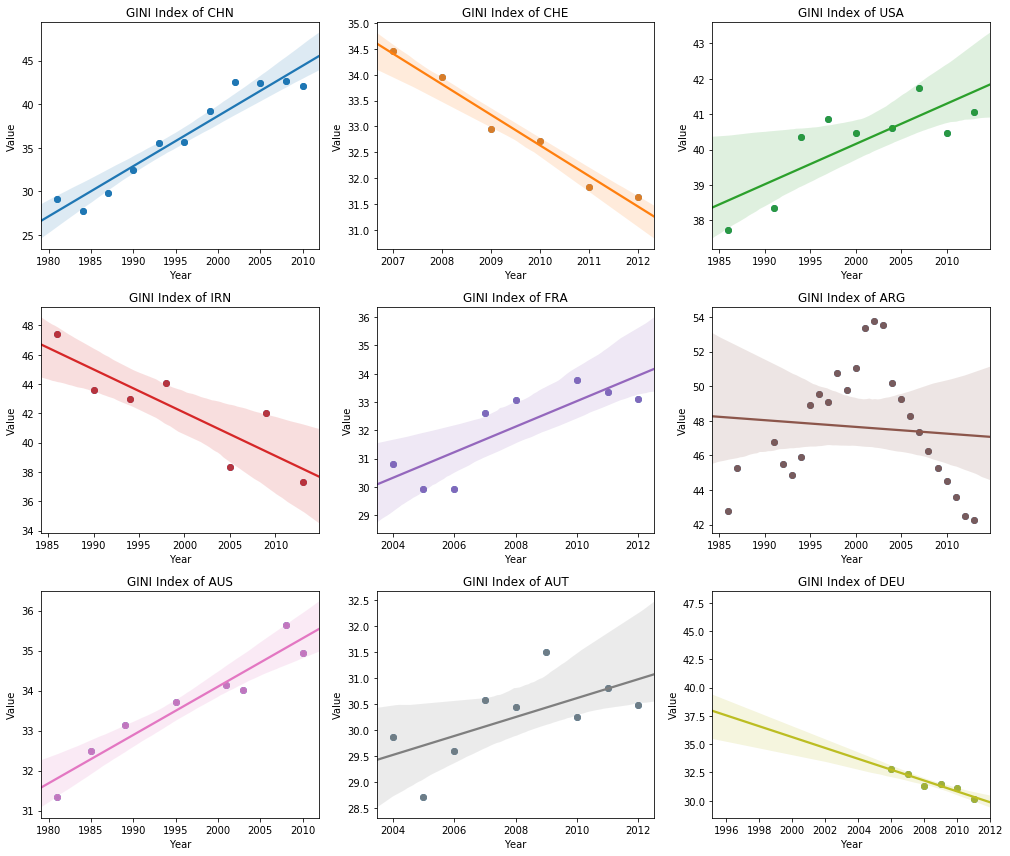

In [15]:
f, ax = plt.subplots(3, 3, figsize = (14, 12))
ctryList = [['CHN', 'CHE', 'USA'], ['IRN', 'FR', 'DE'], ['BE', 'UK', 'IT']]
ctryList = [['CHN', 'CHE', 'USA'], ['IRN', 'FRA', 'ARG'], ['AUS', 'AUT', 'DEU']]
for i in range(0, 3):
    for j in range(0, 3):
        axTmp = ax[i][j]
        ctryTmp = ctryList[i][j]
        axTmp.scatter(gini.loc[gini['CountryCode'] == ctryTmp, 'Year'], gini.loc[gini['CountryCode'] == ctryTmp, 'Value']) 
        sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == ctryTmp], ax=axTmp)
        axTmp.set_title('GINI Index of %s' % ctryTmp)
plt.tight_layout()